In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import time


In [12]:
batch_size = 64 

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    'D:/Kelas Work/bone_data',  
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1685 images belonging to 12 classes.


In [13]:
# Using a simple CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')  # 12 output classes for fracture types
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Setup for TensorBoard
log_dir = "logs/fit/" + time.strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model with TensorBoard
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    callbacks=[tensorboard_callback],
    verbose=1
)

Epoch 1/30
26/26 [==============================] - 29s 1s/step - loss: 2.5181 - accuracy: 0.0987
Epoch 2/30
26/26 [==============================] - 21s 817ms/step - loss: 2.4568 - accuracy: 0.1271
Epoch 3/30
26/26 [==============================] - 21s 825ms/step - loss: 2.4321 - accuracy: 0.1277
Epoch 4/30
26/26 [==============================] - 21s 789ms/step - loss: 2.4220 - accuracy: 0.1407
Epoch 5/30
26/26 [==============================] - 21s 790ms/step - loss: 2.4239 - accuracy: 0.1333
Epoch 6/30
26/26 [==============================] - 21s 815ms/step - loss: 2.4029 - accuracy: 0.1474
Epoch 7/30
26/26 [==============================] - 20s 792ms/step - loss: 2.4081 - accuracy: 0.1561
Epoch 8/30
26/26 [==============================] - 21s 795ms/step - loss: 2.3817 - accuracy: 0.1592
Epoch 9/30
26/26 [==============================] - 21s 795ms/step - loss: 2.3854 - accuracy: 0.1536
Epoch 10/30
26/26 [==============================] - 21s 805ms/step - loss: 2.3777 - accuracy:

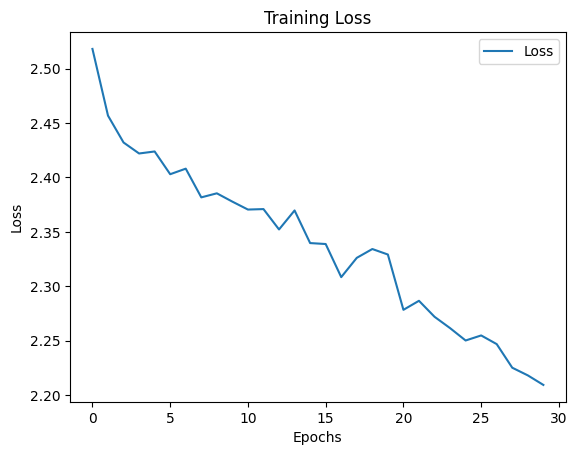

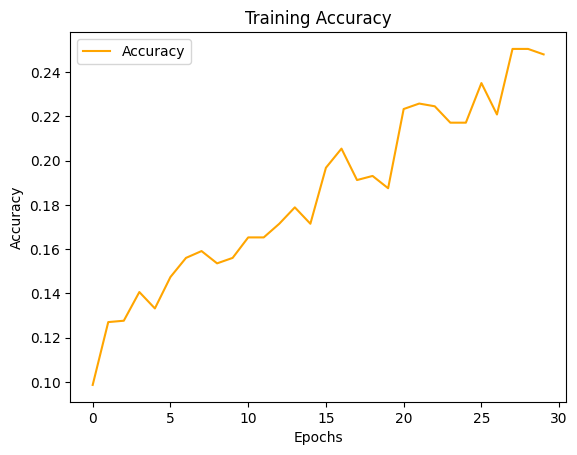

In [15]:
# Plotting training loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Accuracy', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Load and preprocess new image
test_image = image.load_img('D:/Kelas Work/bone_data/Avulsion fracture/Avulsion fracture/2-Figure1-1.png', target_size=(200, 200))
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

# Make a prediction
result = model.predict(test_image)
predicted_class = np.argmax(result)

# Interpret the result
classes = ['Avulsion fracture', 'Comminuted fracture', 'Compression-Crush fracture', 
           'Fracture Dislocation', 'Greenstick fracture', 'Hairline fracture', 
           'Impacted fracture', 'Intra-articular fracture', 'Longitudinal fracture', 
           'Oblique fracture', 'Pathological fracture', 'Spiral fracture']

print(f"The predicted class is: {classes[predicted_class]}")

1/1 [==============================] - 0s 135ms/step
The predicted class is: Hairline fracture
